# Interpretation:
**simple regression (unlikely)**
1. check that the predictor is significant.
1. if predictor is significant then you may conclude that the variable contributes R^2 to the total variance in the model. (larger numbers = more predictive weight)

**multiple regression model**  
Blurb: since it is highly likely you will have multiple variables that you are comparing this can become more complicated  
in short we want to compare how effective the model is while understanding that in general more variables -> a greater r value.

my rule of thumb is you may use as many variables as are significant while all other variables included are significant.  
emphasis this is my rule and not a standard practice.

In [2]:
library(car)
library(boot)

Loading required package: carData

Attaching package: 'boot'

The following object is masked from 'package:car':

    logit



In [3]:
linearRegressionAsumptionsCheck <- function(model){
    pass <- T
    if(dwt(model)$p < .05){
        cat('D-W VIOLATED!\n')
        pass <- F
    }

    if(length(model$coefficients) > 2){
        if(length(colnames(vif(model))) > 0){
           vif <- vif(model)[,'GVIF']
        }
        else {
           vif <- vif(model)
        }
        if(mean(vif) > 1.1){
            cat('NON-COLINEARITY MAY BE VIOLATED!\n')
            cat(vif,'\n')
            cat('Average:', mean(vif),'\n')
            pass <- F
        }
        if(any(vif > 10)){
            cat('NON-COLINEARITY VIOLATED!\n')
            pass <- F
        }

        if(any(1 / vif < .2)){
            cat('TOLERANCE IS VIOLATED!\n')
            pass <- F
        }
    }
    return(pass)
}

In [4]:
d <- read.csv('DS3IM.csv')
d['categoryI'] <- lapply(d['category1'], as.factor)
d['categoryII'] <- lapply(d['category2'], as.factor)
d['categoryIII'] <- d['category3']

In [5]:
head(d)

traitX,traitY,traitZ,itemA,itemB,itemC,itemD,itemE,itemF,itemG,category1,category2,category3,categoryI,categoryII,categoryIII
61,60,31,0,0,1,0,1,1,1,2,3,Elephant,2,3,Elephant
39,50,49,1,1,1,0,1,1,1,1,3,Cat,1,3,Cat
50,28,55,1,0,0,0,0,1,0,1,2,Elephant,1,2,Elephant
40,50,57,0,0,0,1,0,0,1,1,9,Cat,1,9,Cat
39,32,65,1,0,0,1,0,1,0,1,10,Elephant,1,10,Elephant
48,42,55,1,1,0,1,1,1,0,1,1,Cat,1,1,Cat


# For trait X
## Model

In [6]:
cor(d[1:12])

,traitX,traitY,traitZ,itemA,itemB,itemC,itemD,itemE,itemF,itemG,category1,category2
traitX,1.00000000,-0.034807288,-0.02020283,-0.017062932,0.0125354792,0.16184698,0.04614069,0.205004784,0.203719353,0.169610609,-0.089377886,-0.2314050388
traitY,-0.03480729,1.000000000,-0.02060729,0.004983899,0.1261166343,0.01659569,0.14157210,0.127667902,-0.019174383,0.107462841,0.073202692,-0.1001159215
traitZ,-0.02020283,-0.020607293,1.00000000,0.210511573,-0.0800841886,0.03074428,0.15838230,0.036416432,0.187976275,0.173497535,-0.010167369,0.0150856012
itemA,-0.01706293,0.004983899,0.21051157,1.000000000,0.0132912828,-0.02808225,0.05333550,0.009888453,0.087297265,0.030144844,-0.037326152,0.0032592871
itemB,0.01253548,0.126116634,-0.08008419,0.013291283,1.0000000000,0.06058169,0.04235235,0.029118682,-0.042233545,0.040032003,-0.043812587,0.0009832249
itemC,0.16184698,0.016595687,0.03074428,-0.028082248,0.0605816888,1.00000000,0.01310123,0.025275505,0.042644255,0.051961634,-0.040565271,0.0206550632
itemD,0.04614069,0.141572102,0.15838230,0.053335500,0.0423523488,0.01310123,1.00000000,0.088492043,0.072414125,0.089978097,0.021672366,0.0209350037
itemE,0.20500478,0.127667902,0.03641643,0.009888453,0.0291186823,0.02527550,0.08849204,1.000000000,0.039296759,0.132214765,-0.017084511,-0.0181404126
itemF,0.20371935,-0.019174383,0.18797628,0.087297265,-0.0422335448,0.04264426,0.07241413,0.039296759,1.000000000,0.074041626,0.006225407,-0.0313141529
itemG,0.16961061,0.107462841,0.17349754,0.030144844,0.0400320034,0.05196163,0.08997810,0.132214765,0.074041626,1.000000000,-0.036031603,-0.0045046262


In [7]:
model <- lm(traitX ~ itemC + itemE + itemF + itemG + categoryI + categoryII, data = d)
summary(model)
cat('---------------\n\n\n')
if(linearRegressionAsumptionsCheck(model)){
    cat('ALL GOOD!\n')
} else {
    cat('Blia...\n')
}


Call:
lm(formula = traitX ~ itemC + itemE + itemF + itemG + categoryI + 
    categoryII, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.4863  -4.4898  -0.3175   4.3690  30.8659 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   53.1270     0.8745  60.752  < 2e-16 ***
itemC          2.5948     0.4641   5.591 2.93e-08 ***
itemE          2.6565     0.4704   5.648 2.13e-08 ***
itemF          2.8394     0.4644   6.115 1.39e-09 ***
itemG          2.0444     0.4695   4.355 1.47e-05 ***
categoryI2    -1.6858     0.4637  -3.636 0.000291 ***
categoryII2   -7.2810     1.0264  -7.093 2.50e-12 ***
categoryII3  -10.4320     1.0274 -10.153  < 2e-16 ***
categoryII4  -10.8073     1.0327 -10.465  < 2e-16 ***
categoryII5  -10.2664     1.0174 -10.091  < 2e-16 ***
categoryII6  -10.3142     1.0488  -9.834  < 2e-16 ***
categoryII7  -10.2800     0.9638 -10.666  < 2e-16 ***
categoryII8   -9.5046     1.0050  -9.458  < 2e-16 ***
categoryII9   -9.8029    

---------------


ALL GOOD!


In [8]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),53.126977,0.8744833,60.752419,0.000000e+00
itemC,2.594819,0.4641202,5.590834,2.925750e-08
itemE,2.656480,0.4703516,5.647860,2.125029e-08
itemF,2.839437,0.4643771,6.114508,1.394467e-09
itemG,2.044438,0.4694936,4.354560,1.472780e-05
categoryI2,-1.685814,0.4636708,-3.635800,2.914640e-04
categoryII2,-7.280997,1.0264472,-7.093396,2.497137e-12
categoryII3,-10.431998,1.0274378,-10.153411,4.190840e-23
categoryII4,-10.807326,1.0327371,-10.464740,2.252125e-24
categoryII5,-10.266420,1.0173538,-10.091298,7.447177e-23


## Assumptions:
- independence of errors: for DW sig value = assumption is violated
- not colinear: violation if vif any value > 10 or average value considerably > 1 or tolerance < .2

Random error and homoscedacity:

normal should appear approximately equally distributed (no real pattern of data)

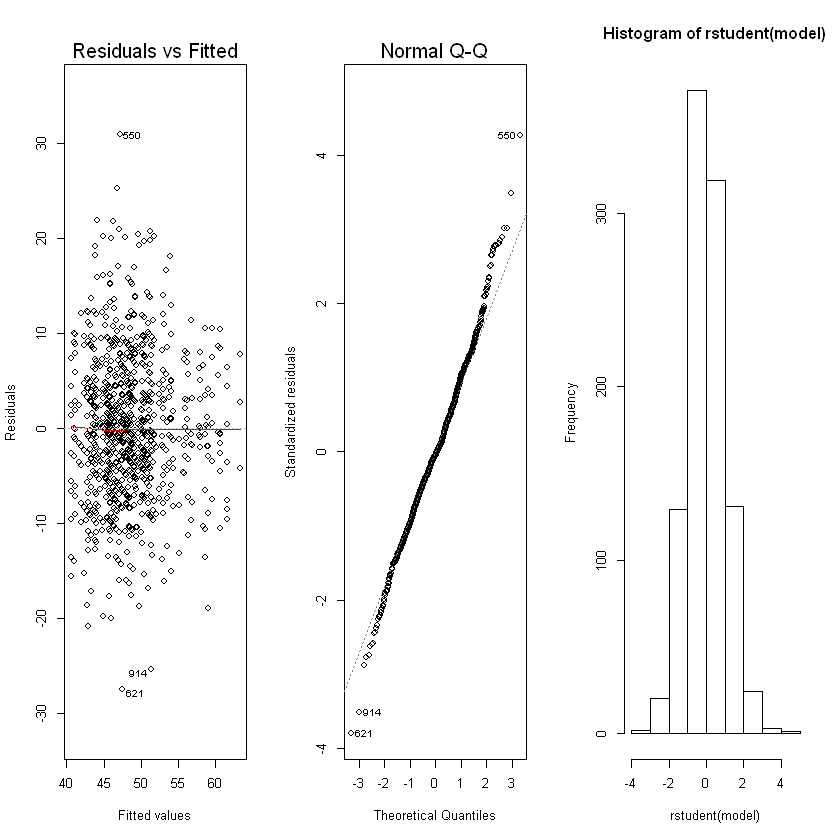

In [9]:
par(mfrow=c(1,3))
plot(model, which=1:2)
hist(rstudent(model))
par(mfrow=c(1,1))

In [10]:
# bootReg <- function(formula, data, i){
#     d <- data[i,]
#     fit <- lm(formula, data = d)
#     return(coef(fit))
# }
# robustModel <- boot(statistic = bootReg, formula = traitX ~ itemC + itemE + itemF + itemG + category1 + category2, data = d, R = 2000)

In [11]:
# coefs <- c()
# predictors <- c('intercept', 'itemC', 'itemE', 'itemF', 'itemG', 'category1', 'category2')
# for(i in 1:length(predictors)){
#     cat(predictors[i],'\n')
#     cat(boot.ci(robustModel, type = "bca", index = i)[['bca']][4], 
#         boot.ci(robustModel, type = "bca", index = i)[['bca']][5], '\n')
#     cat('-------------------------\n\n')
#     coefs <- c(coefs, mean(boot.ci(robustModel, type = "bca", index = i)[['bca']][4:5]))
# }

# cat('traitX =', coefs[1], '+')
# for(i in 2:length(predictors)){
#     cat(coefs,'*', predictors[i])
# }

# For trait Y
## Model

In [12]:
# mapCat3 <- function(el){
#     if(el == 'Cat' || el == 'Dog') return('CatOrDog')
#     else return(as.character(el))
# }

d1 <- d
d1[d1[, 'categoryII'] %in% 6:10, 'categoryII'] <- 10

In [13]:
head(d1)

traitX,traitY,traitZ,itemA,itemB,itemC,itemD,itemE,itemF,itemG,category1,category2,category3,categoryI,categoryII,categoryIII
61,60,31,0,0,1,0,1,1,1,2,3,Elephant,2,3,Elephant
39,50,49,1,1,1,0,1,1,1,1,3,Cat,1,3,Cat
50,28,55,1,0,0,0,0,1,0,1,2,Elephant,1,2,Elephant
40,50,57,0,0,0,1,0,0,1,1,9,Cat,1,10,Cat
39,32,65,1,0,0,1,0,1,0,1,10,Elephant,1,10,Elephant
48,42,55,1,1,0,1,1,1,0,1,1,Cat,1,1,Cat


Some playing:

In [21]:
model1 <- lm(traitY ~ itemB + itemD + itemE+ itemG + categoryI, data = d)
model2 <- lm(traitY ~ itemB + itemD + itemE+ itemG + categoryI + categoryII, data = d)
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
994,118791.98,NA,NA,NA,NA
985,99555.72,9,19236.27,21.14698,6.735622e-33


---------

In [28]:
model <- lm(traitY ~ itemB + itemD + itemE + itemG + categoryI, data = d)
summary(model)
cat('---------------\n\n\n')
if(linearRegressionAsumptionsCheck(model)){
    cat('ALL GOOD!\n')
} else {
    cat('Blia...\n')
}


Call:
lm(formula = traitY ~ itemB + itemD + itemE + itemG + categoryI, 
    data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.676  -8.354   0.956   7.649  39.310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.8657     0.7955  51.369  < 2e-16 ***
itemB         2.6605     0.6933   3.837 0.000132 ***
itemD         2.6594     0.6973   3.814 0.000145 ***
itemE         2.3532     0.7018   3.353 0.000829 ***
itemG         1.8249     0.7005   2.605 0.009326 ** 
categoryI2    1.8105     0.6929   2.613 0.009109 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.93 on 994 degrees of freedom
Multiple R-squared:  0.05962,	Adjusted R-squared:  0.05489 
F-statistic:  12.6 on 5 and 994 DF,  p-value: 6.895e-12


---------------


ALL GOOD!


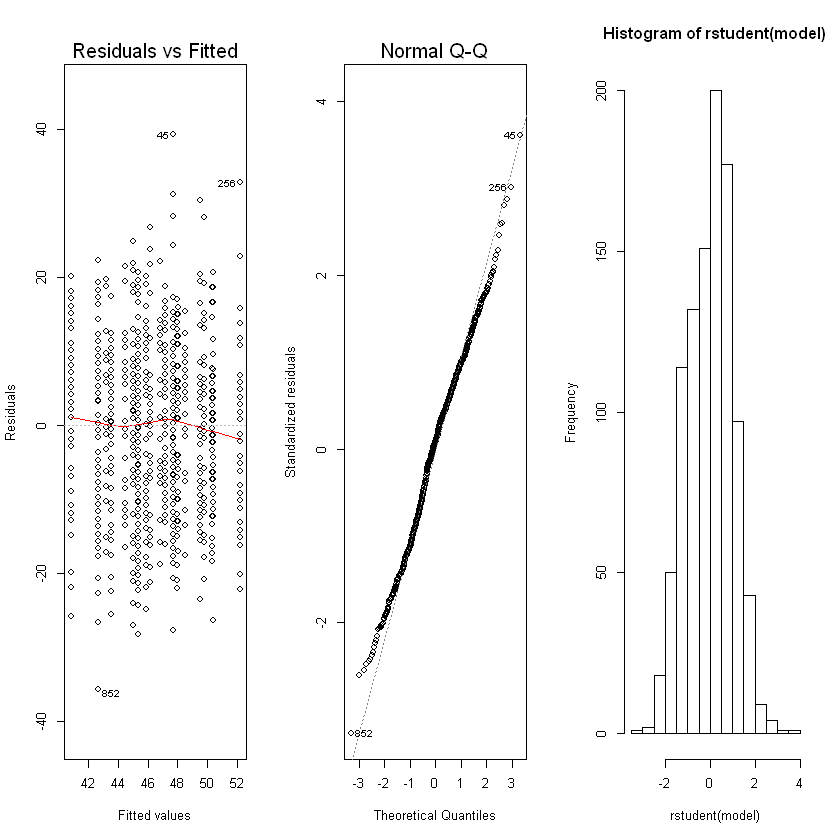

In [16]:
par(mfrow=c(1,3))
plot(model, which=1:2)
hist(rstudent(model))
par(mfrow=c(1,1))

In [17]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),40.865654,0.7955289,51.369166,5.419084e-282
itemB,2.660527,0.6933499,3.837207,1.322934e-04
itemD,2.659356,0.6972669,3.813971,1.451802e-04
itemE,2.353186,0.7017783,3.353176,8.290458e-04
itemG,1.824872,0.7005415,2.604945,9.326115e-03
categoryI2,1.810460,0.6928533,2.613049,9.109351e-03


# For trait Z
## Model

In [18]:
head(d)

traitX,traitY,traitZ,itemA,itemB,itemC,itemD,itemE,itemF,itemG,category1,category2,category3,categoryI,categoryII,categoryIII
61,60,31,0,0,1,0,1,1,1,2,3,Elephant,2,3,Elephant
39,50,49,1,1,1,0,1,1,1,1,3,Cat,1,3,Cat
50,28,55,1,0,0,0,0,1,0,1,2,Elephant,1,2,Elephant
40,50,57,0,0,0,1,0,0,1,1,9,Cat,1,9,Cat
39,32,65,1,0,0,1,0,1,0,1,10,Elephant,1,10,Elephant
48,42,55,1,1,0,1,1,1,0,1,1,Cat,1,1,Cat


In [19]:
model <- lm(traitZ ~ itemA + itemB + itemD + itemF + itemG, data = d)
summary(model)
cat('---------------\n\n\n')
if(linearRegressionAsumptionsCheck(model)){
    cat('ALL GOOD!\n')
} else {
    cat('Blia...\n')
}


Call:
lm(formula = traitZ ~ itemA + itemB + itemD + itemF + itemG, 
    data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.1614  -4.3863  -0.0753   4.4398  29.9328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.1614     0.5184  89.038  < 2e-16 ***
itemA         2.8292     0.4513   6.269 5.41e-10 ***
itemB        -1.3222     0.4496  -2.941  0.00335 ** 
itemD         1.9297     0.4521   4.268 2.16e-05 ***
itemF         2.2248     0.4527   4.915 1.04e-06 ***
itemG         2.2442     0.4516   4.969 7.92e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.089 on 994 degrees of freedom
Multiple R-squared:  0.1203,	Adjusted R-squared:  0.1159 
F-statistic:  27.2 on 5 and 994 DF,  p-value: < 2.2e-16


---------------


ALL GOOD!


In [20]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),46.161441,0.5184471,89.037894,0.000000e+00
itemA,2.829167,0.4512886,6.269085,5.405583e-10
itemB,-1.322181,0.4496300,-2.940597,3.351694e-03
itemD,1.929739,0.4521211,4.268191,2.159191e-05
itemF,2.224835,0.4526787,4.914823,1.038895e-06
itemG,2.244155,0.4516304,4.969008,7.920364e-07
